# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Conclusions

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Turn project folder path into a string
path = r'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [3]:
path

'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [4]:
# Import pugetsound_tides_currents_lunar.pkl dataset
pugetsound_tides_currents_lunar = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'pugetsound_tides_currents_lunar.pkl'))

In [5]:
pugetsound_tides_currents_lunar.head()

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated
0,Alki,1/1/24,Monday,0:24:00,ebb,-0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75
1,Alki,1/1/24,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75
2,Alki,1/1/24,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75
3,Alki,1/1/24,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75
4,Alki,1/1/24,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75


In [6]:
pugetsound_tides_currents_lunar.shape

(16626, 15)

In [7]:
type(pugetsound_tides_currents_lunar)

pandas.core.frame.DataFrame

### 2. Subsetting, wrangling, and cleaning time-series data


In [8]:
# Create separate DataFrames for each dive site
alki_data = pugetsound_tides_currents_lunar[pugetsound_tides_currents_lunar['Dive_Site'] == 'Alki'].copy()
tacoma_data = pugetsound_tides_currents_lunar[pugetsound_tides_currents_lunar['Dive_Site'] == 'Tacoma Narrows'].copy()
deception_data = pugetsound_tides_currents_lunar[pugetsound_tides_currents_lunar['Dive_Site'] == 'Deception Pass'].copy()
saltcreek_data = pugetsound_tides_currents_lunar[pugetsound_tides_currents_lunar['Dive_Site'] == 'Salt Creek'].copy()

In [9]:
deception_data.head()

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated
4138,Deception Pass,1/1/24,Monday,0:48:00,slack,0.0,NaN,NaN,DECEPTION PASS NARROWS,PUG1701,NaN,NaN,48.405722,-122.6449,0.75
4139,Deception Pass,1/1/24,Monday,2:01:00,Low,NaN,19.0,0.62,NaN,NaN,"CORNET BAY, DECEPTION PASS",9447995.0,48.405722,-122.6449,0.75
4140,Deception Pass,1/1/24,Monday,3:18:00,flood,4.0,NaN,NaN,DECEPTION PASS NARROWS,PUG1701,NaN,NaN,48.405722,-122.6449,0.75
4141,Deception Pass,1/1/24,Monday,6:42:00,slack,0.0,NaN,NaN,DECEPTION PASS NARROWS,PUG1701,NaN,NaN,48.405722,-122.6449,0.75
4142,Deception Pass,1/1/24,Monday,9:12:00,High,NaN,324.0,10.63,NaN,NaN,"CORNET BAY, DECEPTION PASS",9447995.0,48.405722,-122.6449,0.75


In [10]:
# Remove columns
columns_to_remove = ['Day_of_Week', 'Height (cm)', 'Current_Station_Name', 
                    'Current_Station_ID', 'Tide_Station_Name', 'Tide_Station_ID', 'Latitude', 'Longitude',
                     'Dive_Site', 'Event', 'Height (ft)', 'Moon Illuminated']
deception_data = deception_data.drop(columns=columns_to_remove, axis=1)

In [11]:
deception_data.head()

,Date,Time,Current_Speed_(knots)
4138,1/1/24,0:48:00,0.0
4139,1/1/24,2:01:00,NaN
4140,1/1/24,3:18:00,4.0
4141,1/1/24,6:42:00,0.0
4142,1/1/24,9:12:00,NaN


In [12]:
# Remove rows with NaN values in 'Current_Speed_(knots)' column
deception_data = deception_data.dropna(subset=['Current_Speed_(knots)'])

In [13]:
deception_data

,Date,Time,Current_Speed_(knots)
4138,1/1/24,0:48:00,0.0
4140,1/1/24,3:18:00,4.0
4141,1/1/24,6:42:00,0.0
4143,1/1/24,9:30:00,-5.3
4144,1/1/24,13:42:00,0.0
...,...,...,...
8374,12/31/24,10:30:00,0.0
8376,12/31/24,12:30:00,3.2
8377,12/31/24,15:06:00,0.0
8379,12/31/24,18:06:00,-7.5


In [14]:
deception_data.describe()

,Current_Speed_(knots)
count,2829.000000
mean,-0.353376
std,3.688294
min,-8.600000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.200000


In [15]:
# Convert the 'Date' column to datetime type
deception_data['Date'] = pd.to_datetime(deception_data['Date'])

In [16]:
deception_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 4138 to 8380
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   2829 non-null   datetime64[ns]
 1   Time                   2829 non-null   object        
 2   Current_Speed_(knots)  2829 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 88.4+ KB


In [17]:
# Calculate the maximum absolute value for each day
max_abs_values = deception_data.groupby('Date')['Current_Speed_(knots)'].transform(lambda x: x.abs().max())

In [18]:
# Filter the DataFrame to keep rows with the maximum absolute value
result = deception_data[deception_data['Current_Speed_(knots)'].abs() == max_abs_values]

In [19]:
result.describe()

,Current_Speed_(knots)
count,376.000000
mean,-5.930053
std,2.548249
min,-8.600000
25%,-7.100000
50%,-6.300000
75%,-5.600000
max,7.100000


In [20]:
result.head()

,Date,Time,Current_Speed_(knots)
4143,2024-01-01,9:30:00,-5.3
4155,2024-01-02,10:12:00,-5.1
4167,2024-01-03,11:00:00,-4.9
4179,2024-01-04,11:54:00,-4.9
4191,2024-01-05,12:54:00,-5.4


In [21]:
result

,Date,Time,Current_Speed_(knots)
4143,2024-01-01,9:30:00,-5.3
4155,2024-01-02,10:12:00,-5.1
4167,2024-01-03,11:00:00,-4.9
4179,2024-01-04,11:54:00,-4.9
4191,2024-01-05,12:54:00,-5.4
...,...,...,...
8331,2024-12-27,15:12:00,-6.5
8343,2024-12-28,15:54:00,-7.2
8355,2024-12-29,16:36:00,-7.6
8367,2024-12-30,17:18:00,-7.7


In [22]:
# Rename dataframe
deception_data_max_current = result.copy()

In [23]:
deception_data_max_current

,Date,Time,Current_Speed_(knots)
4143,2024-01-01,9:30:00,-5.3
4155,2024-01-02,10:12:00,-5.1
4167,2024-01-03,11:00:00,-4.9
4179,2024-01-04,11:54:00,-4.9
4191,2024-01-05,12:54:00,-5.4
...,...,...,...
8331,2024-12-27,15:12:00,-6.5
8343,2024-12-28,15:54:00,-7.2
8355,2024-12-29,16:36:00,-7.6
8367,2024-12-30,17:18:00,-7.7


In [24]:
# Remove duplicates based on the 'Date' column
deception_data_max_current.drop_duplicates(subset='Date', keep='first', inplace=True)

In [25]:
deception_data_max_current

,Date,Time,Current_Speed_(knots)
4143,2024-01-01,9:30:00,-5.3
4155,2024-01-02,10:12:00,-5.1
4167,2024-01-03,11:00:00,-4.9
4179,2024-01-04,11:54:00,-4.9
4191,2024-01-05,12:54:00,-5.4
...,...,...,...
8331,2024-12-27,15:12:00,-6.5
8343,2024-12-28,15:54:00,-7.2
8355,2024-12-29,16:36:00,-7.6
8367,2024-12-30,17:18:00,-7.7


In [26]:
deception_data_max_current.describe()

,Current_Speed_(knots)
count,366.000000
mean,-6.023770
std,2.387228
min,-8.600000
25%,-7.200000
50%,-6.300000
75%,-5.700000
max,7.100000


In [27]:
deception_data_max_current.drop(columns='Time', inplace=True)


In [28]:
deception_data_max_current

,Date,Current_Speed_(knots)
4143,2024-01-01,-5.3
4155,2024-01-02,-5.1
4167,2024-01-03,-4.9
4179,2024-01-04,-4.9
4191,2024-01-05,-5.4
...,...,...
8331,2024-12-27,-6.5
8343,2024-12-28,-7.2
8355,2024-12-29,-7.6
8367,2024-12-30,-7.7


In [29]:
# Set the "Date" column as the index

from datetime import datetime

deception_data_max_current['datetime'] = pd.to_datetime(deception_data_max_current['Date']) # Create a datetime column from "Date.""
deception_data_max_current = deception_data_max_current.set_index('datetime') # Set the datetime as the index of the dataframe.
deception_data_max_current.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
deception_data_max_current.head()

,Current_Speed_(knots)
datetime,
2024-01-01,-5.3
2024-01-02,-5.1
2024-01-03,-4.9
2024-01-04,-4.9
2024-01-05,-5.4


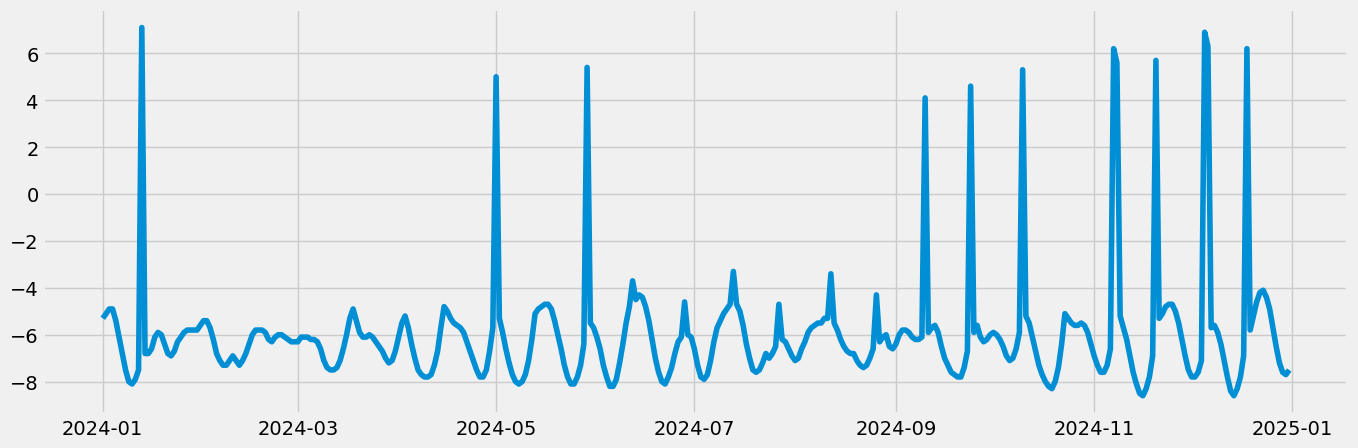

In [30]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(deception_data_max_current)

### 3. Time-series analysis: decomposition

In [31]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(deception_data_max_current, model='additive')

In [32]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

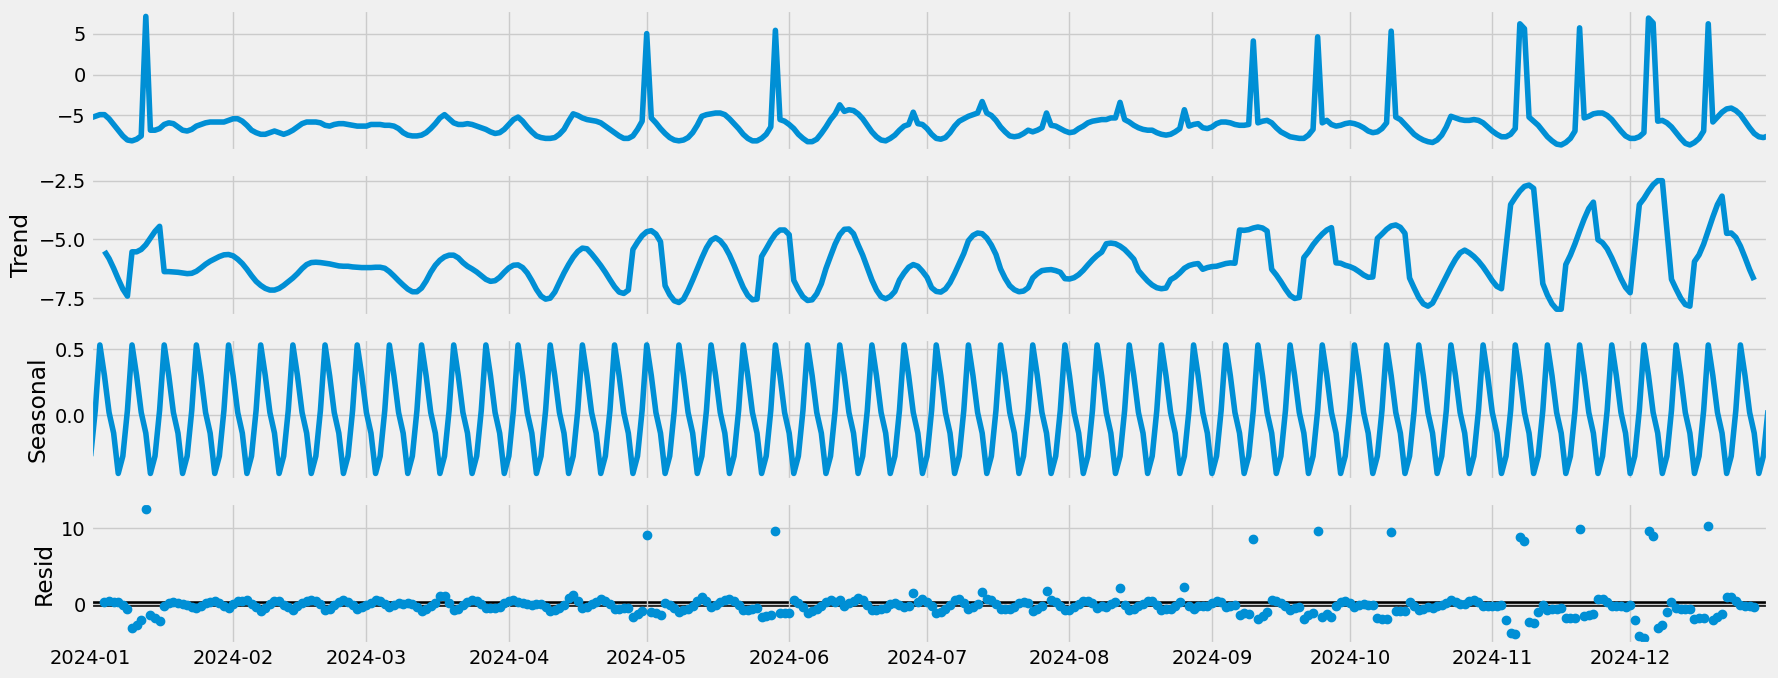

In [33]:
# Plot the separate components

decomposition.plot()
plt.show()

#### By looking at the trend, it appears that we are working with a stationary time series.

### 4. Testing for stationarity

In [34]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(deception_data_max_current['Current_Speed_(knots)'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.642961
p-value                          0.004991
Number of Lags Used             15.000000
Number of Observations Used    350.000000
Critical Value (1%)             -3.449173
Critical Value (5%)             -2.869833
Critical Value (10%)            -2.571188
dtype: float64


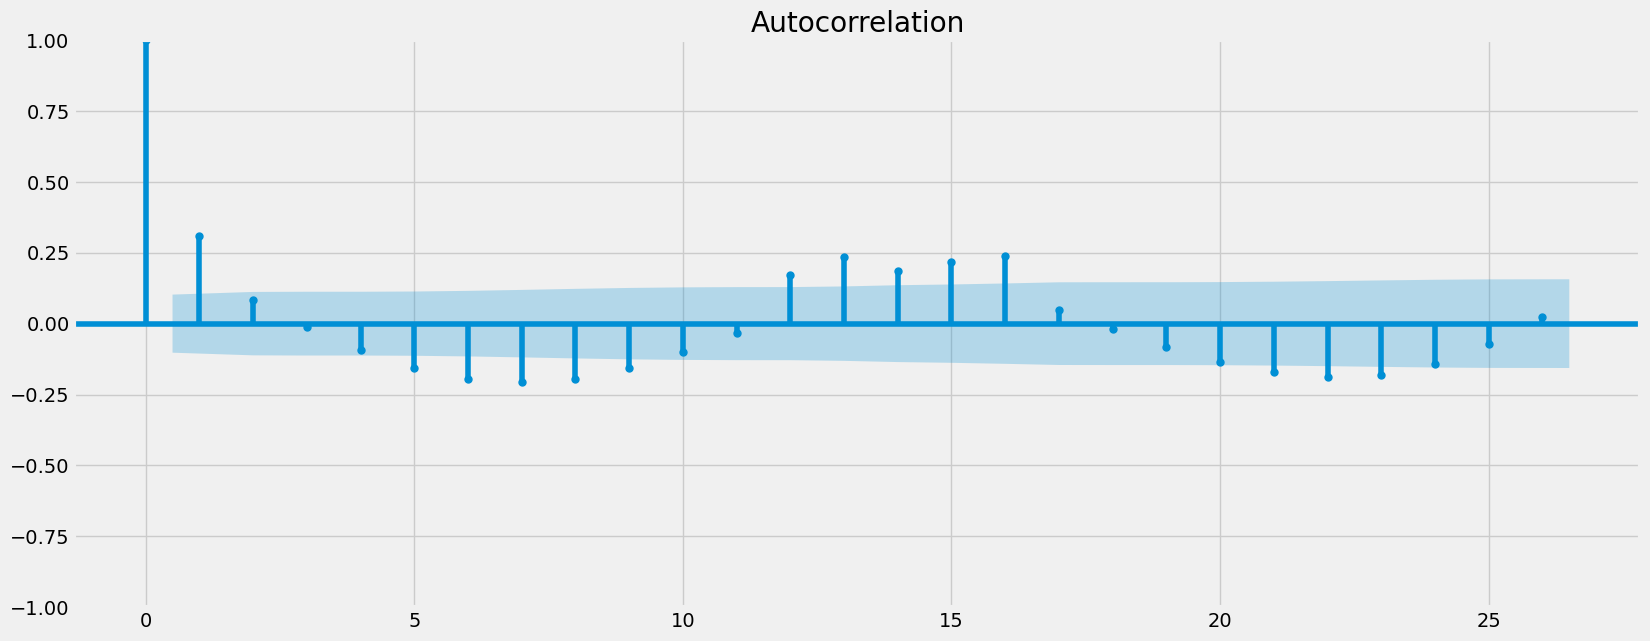

In [35]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(deception_data_max_current)
plt.show()

### 5. Conclusions

#### The test statistic of -3.642961 suggests that it is less likely that the time series is non-stationary.

#### The p-value associated with the test statistic is 0.004991. This is a very small p-value (less than 0.05). In hypothesis testing, a small p-value typically indicates strong evidence against the null hypothesis.

#### The test statistic is more negative than the critical values, indicating significance.

#### These results provide strong evidence that the time series data is stationary. 